### target variable에 대한 EDA
- class가 yes, no (or 0,1) 처럼  binary 일 때

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

train = pd.read_csv('C:/Users/Administrator/Desktop/개인공부자료/정형데이터분석/bank.csv')

In [3]:
train

## 우리의 target var은 deposit(정기예금 가입 여부)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


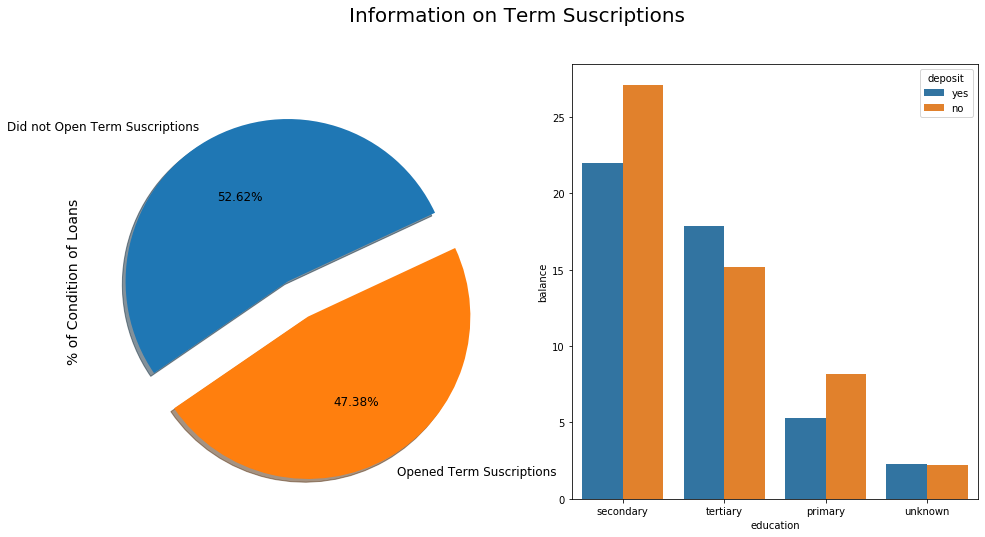

In [4]:
# 1행 2열의 plot
f, ax = plt.subplots(1,2, figsize=(16,8))

plt.suptitle('Information on Term Suscriptions', fontsize=20)

labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

# plot1 - 파이차트
train["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, 
                                             labels=labels, fontsize=12, startangle=25)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)


# plot2 - 막대그래프
## 교육수준에 따른 balance(잔고)를 deposit(정기예금) 유무에 따라서 나누어봄

sns.barplot(x="education", y="balance", hue="deposit", data=train, estimator=lambda x: len(x) / len(train) * 100)
ax[1].set_xticklabels(train["education"].unique(), rotation=0, rotation_mode="anchor")

plt.show()

### numeric data distribution

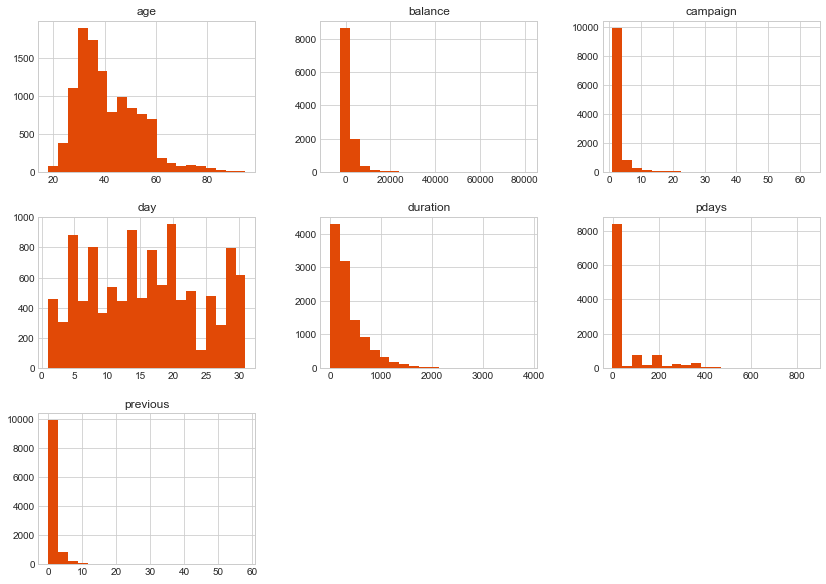

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# df중에서 numeric variable에 대한 히스토그램을 모두 그려줌

train.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

### 특정 변수를 두 개의 변수로 나누어서 파악하기
- ex1) 두 개의 변수(default, deposit)에 따른 balance(잔고)의 분포 파악

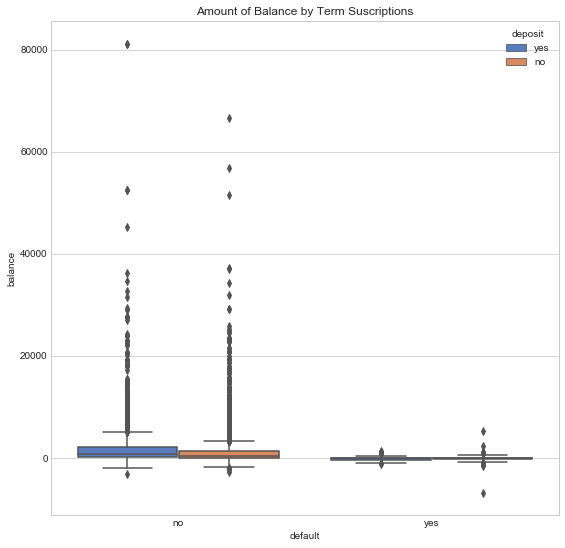

In [20]:
## x변수(default)가 yes/no로 cateogorical이므로 box plot사용

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=train, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions") ##

plt.show()

- ex2) 두 개의 변수(job, deposit)에 따른 balance(잔고)의 분포 파악

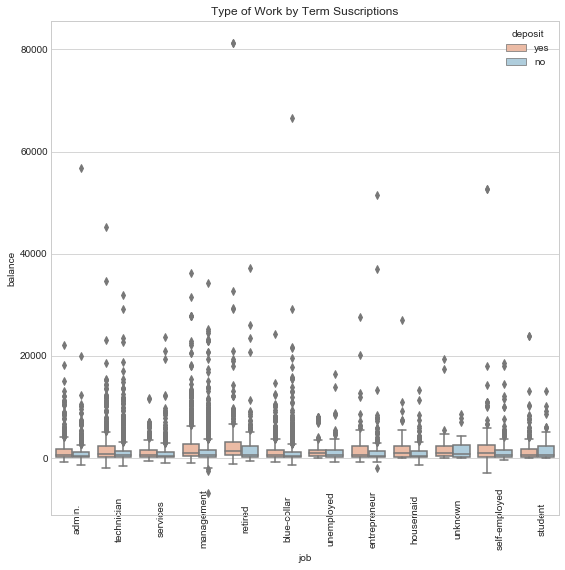

In [22]:
fig = plt.figure(figsize=(20,20))
ax2 = fig.add_subplot(222)

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=train, palette="RdBu", ax=ax2)

g1.set_xticklabels(train["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

plt.show()

- ex3) 두 개의 변수(education, deposit)에 따른 balance(잔고)의 분포 파악

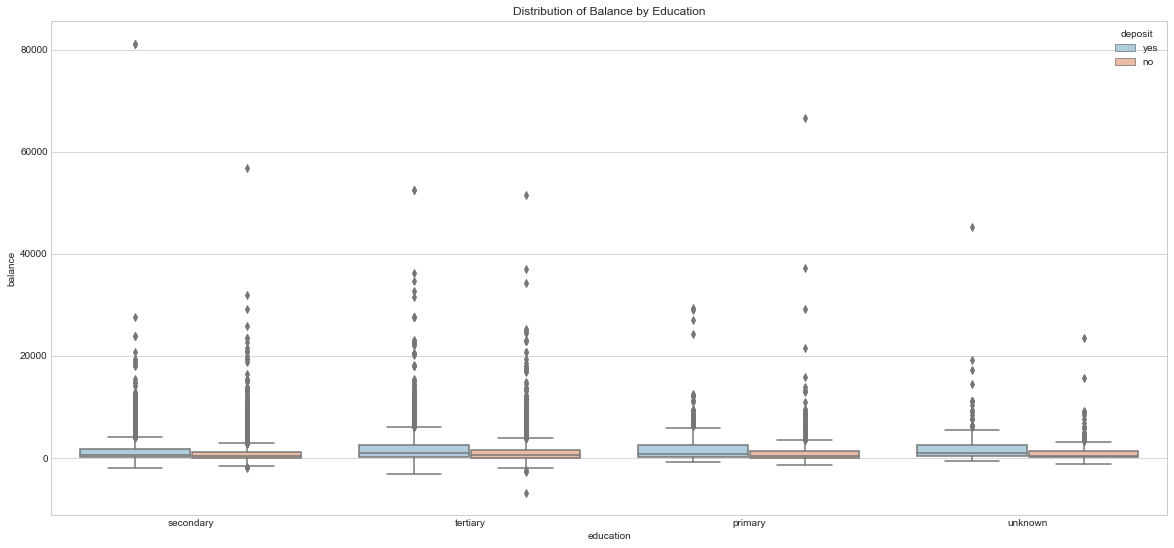

In [24]:
fig = plt.figure(figsize=(20,20))
ax3 = fig.add_subplot(212)

g2 = sns.boxplot(data=train, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")

plt.show()

### Correlation

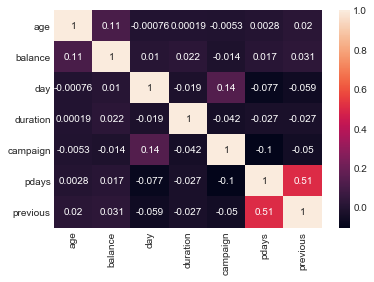

In [25]:
sns.heatmap(train.corr(), annot=True)

### 결측치 처리
- Unknown을 어떻게 할 것인가